In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix 
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('Admission_Predict.csv')

In [3]:
df.head()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,1,337,118,4,4.5,4.5,9.65,1,0.92
1,2,324,107,4,4.0,4.5,8.87,1,0.76
2,3,316,104,3,3.0,3.5,8.00,1,0.72
3,4,322,110,3,3.5,2.5,8.67,1,0.80
4,5,314,103,2,2.0,3.0,8.21,0,0.65


In [4]:
df.shape

(400, 9)

In [5]:
print('Number of Rows:', df.shape[0])
print('Number of Columns:', df.shape[1])

Number of Rows: 400
Number of Columns: 9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Serial No.         400 non-null    int64  
 1   GRE Score          400 non-null    int64  
 2   TOEFL Score        400 non-null    int64  
 3   University Rating  400 non-null    int64  
 4   SOP                400 non-null    float64
 5   LOR                400 non-null    float64
 6   CGPA               400 non-null    float64
 7   Research           400 non-null    int64  
 8   Chance of Admit    400 non-null    float64
dtypes: float64(4), int64(5)
memory usage: 28.2 KB


In [7]:
df.isnull().sum()

Serial No.           0
GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [8]:
df.duplicated().any()

False

In [9]:
df.describe()

,Serial No.,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,200.500000,316.807500,107.410000,3.087500,3.400000,3.452500,8.598925,0.547500,0.724350
std,115.614301,11.473646,6.069514,1.143728,1.006869,0.898478,0.596317,0.498362,0.142609
min,1.000000,290.000000,92.000000,1.000000,1.000000,1.000000,6.800000,0.000000,0.340000
25%,100.750000,308.000000,103.000000,2.000000,2.500000,3.000000,8.170000,0.000000,0.640000
50%,200.500000,317.000000,107.000000,3.000000,3.500000,3.500000,8.610000,1.000000,0.730000
75%,300.250000,325.000000,112.000000,4.000000,4.000000,4.000000,9.062500,1.000000,0.830000
max,400.000000,340.000000,120.000000,5.000000,5.000000,5.000000,9.920000,1.000000,0.970000


In [10]:
df.columns

Index(['Serial No.', 'GRE Score', 'TOEFL Score', 'University Rating', 'SOP',
       'LOR ', 'CGPA', 'Research', 'Chance of Admit '],
      dtype='object')

In [11]:
df = df.drop('Serial No.',axis=1)

In [12]:
df.columns

Index(['GRE Score', 'TOEFL Score', 'University Rating', 'SOP', 'LOR ', 'CGPA',
       'Research', 'Chance of Admit '],
      dtype='object')

In [13]:
x = df.drop('Chance of Admit ', axis=1)

In [14]:
y = df['Chance of Admit ']

In [15]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=.20, random_state=101)

In [16]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# LinearRegression

In [17]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(x_train,y_train)
y_pred = lr.predict(x_test)

In [18]:
print('MSE =',mean_squared_error(y_test,y_pred))
print('MAE =',mean_absolute_error(y_test,y_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test,y_pred)))
print('R^2 =',r2_score(y_test,y_pred))

MSE = 0.003692881582428969
MAE = 0.04261381882403007
RMSE = 0.06076908410062611
R^2 = 0.8001063801904392


# KNN

In [19]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [20]:
print('MSE =',mean_squared_error(y_test,knn_pred))
print('MAE =',mean_absolute_error(y_test,knn_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test,knn_pred)))
print('R^2 =',r2_score(y_test,knn_pred))

MSE = 0.005205200000000002
MAE = 0.0526
RMSE = 0.07214707201266038
R^2 = 0.7182454279651304


# SVM

In [21]:
from sklearn.svm import LinearSVR
sv = LinearSVR()
sv.fit(x_train,y_train)
sv_pred = sv.predict(x_test)

In [22]:
print('MSE =',mean_squared_error(y_test,sv_pred))
print('MAE =',mean_absolute_error(y_test,sv_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test,sv_pred)))
print('R^2 =',r2_score(y_test,sv_pred))

MSE = 0.004033335932309587
MAE = 0.04309246882349747
RMSE = 0.06350855007248699
R^2 = 0.7816777761698399


# RandomForest

In [23]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
rf.fit(x_train,y_train)
rf_pred = rf.predict(x_test)

In [24]:
print('MSE =',mean_squared_error(y_test,rf_pred))
print('MAE =',mean_absolute_error(y_test,rf_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test,rf_pred)))
print('R^2 =',r2_score(y_test,rf_pred))

MSE = 0.004156837875000001
MAE = 0.04655125000000006
RMSE = 0.0644735439928658
R^2 = 0.7749926849133633


# GradientBoosting

In [25]:
from sklearn.ensemble import GradientBoostingRegressor
gb = GradientBoostingRegressor()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

In [26]:
print('MSE =',mean_squared_error(y_test,gb_pred))
print('MAE =',mean_absolute_error(y_test,gb_pred))
print('RMSE =',np.sqrt(mean_squared_error(y_test,gb_pred)))
print('R^2 =',r2_score(y_test,gb_pred))

MSE = 0.004494014626395701
MAE = 0.048413571932416154
RMSE = 0.06703741213975746
R^2 = 0.7567414954701904


In [27]:
final_data = pd.DataFrame({'Model':['LR','KNN','SVM','RF','GB'],
                          'R^2 Score':[
                              r2_score(y_test,y_pred),
                              r2_score(y_test,knn_pred),
                              r2_score(y_test,sv_pred),
                              r2_score(y_test,rf_pred),
                              r2_score(y_test,gb_pred)]})

In [28]:
final_data

,Model,R^2 Score
0,LR,0.800106
1,KNN,0.718245
2,SVM,0.781678
3,RF,0.774993
4,GB,0.756741


<AxesSubplot:xlabel='Model', ylabel='R^2 Score'>

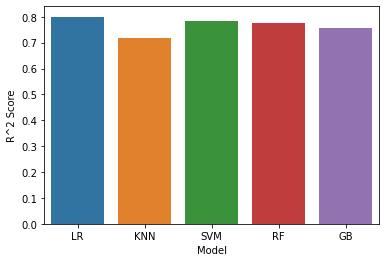

In [29]:
sns.barplot(final_data['Model'],final_data['R^2 Score'])

# Classification

In [30]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [31]:
y_train = [1 if value>.80 else 0 for value in y_train]
y_test = [1 if value>.80 else 0 for value in y_test]

In [32]:
y_train = np.array(y_train)
y_test = np.array(y_test)

In [33]:
y_train

array([0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,

In [34]:
y_test

array([0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0])

# LogisticRegression

In [35]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)
lr_pred = lr.predict(x_test)

In [36]:
print(accuracy_score(y_test,lr_pred))

0.9375


# KNN

In [37]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
knn_pred = knn.predict(x_test)

In [38]:
print(accuracy_score(y_test,knn_pred))

0.9375


# SVM

In [39]:
from sklearn.svm import SVC
svc = SVC()
svc.fit(x_train,y_train)
svc_pred = svc.predict(x_test)

In [40]:
print(accuracy_score(y_test,svc_pred))

0.9375


# RandomForest

In [41]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(n_estimators=10, criterion='gini',random_state=1)
rfc.fit(x_train,y_train)
rfc_pred = rfc.predict(x_test)

In [42]:
print(accuracy_score(y_test,rfc_pred))

0.925


# GradientBoosting

In [43]:
from sklearn.ensemble import GradientBoostingClassifier
gb = GradientBoostingClassifier()
gb.fit(x_train,y_train)
gb_pred = gb.predict(x_test)

              precision    recall  f1-score   support

           0       0.97      0.93      0.95        68
           1       0.67      0.83      0.74        12

    accuracy                           0.91        80
   macro avg       0.82      0.88      0.84        80
weighted avg       0.92      0.91      0.92        80



In [45]:
print(accuracy_score(y_test,gb_pred))

0.9125


In [46]:
final_data = pd.DataFrame({'Model':['LR','KNN','RF','SVM','GB'],
                          'Accuracy':[accuracy_score(y_test,lr_pred),
                                     accuracy_score(y_test,knn_pred),
                                     accuracy_score(y_test,rfc_pred),
                                     accuracy_score(y_test,svc_pred),
                                     accuracy_score(y_test,gb_pred)]})

In [47]:
final_data

,Model,Accuracy
0,LR,0.9375
1,KNN,0.9375
2,RF,0.9250
3,SVM,0.9375
4,GB,0.9125


<AxesSubplot:xlabel='Model', ylabel='Accuracy'>

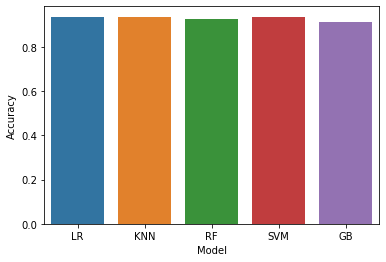

In [48]:
sns.barplot(final_data['Model'],final_data['Accuracy'])